In [1]:
#Step 1: load the data into R 
data=read.table("../datasets//RNAseq//multicell_rnaseq.tpm",header=TRUE,sep='\t',row.names=1)

In [2]:
#Use the 'head' command to examine the structure of your data matrix. 
head(data)

,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,⋯,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
ENSG00000242268.2,1.44,0.02,0.12,1.41,0.00,0.60,0.00,0.29,0.00,0.05,⋯,0.74,0.00,0.14,0.00,0.02,0.00,0.00,0.00,0.00,0.00
ENSG00000167578.12,46.45,1.85,19.95,9.46,2.67,2.25,5.04,13.60,59.20,1.16,⋯,21.47,44.18,13.72,7.31,0.31,4.15,30.42,8.26,0.76,3.38
ENSG00000270112.2,0.27,0.30,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,⋯,1.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000078237.4,45.71,1.25,28.88,7.91,0.09,29.66,16.45,7.11,10.03,0.03,⋯,5.18,26.87,14.56,17.76,0.38,4.58,7.07,7.47,2.86,9.02
ENSG00000263642.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000225275.4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
#Use the nrow and ncol commands to calculate the dimensions of your data matrix 
num_genes=nrow(data)
#use the print command to print the variables you generated above 
print(num_genes)

num_samples=ncol(data)
print(num_samples)

[1] 57820
[1] 410


In [4]:
#Step 2: Load the batches file that provides metadata annotations for each sample
batches=read.table("../datasets//RNAseq/rnaseq_batches.txt",header=TRUE,sep='\t')
head(batches)

Sample,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES-derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,Blood,Blood,Lymphoblastoid


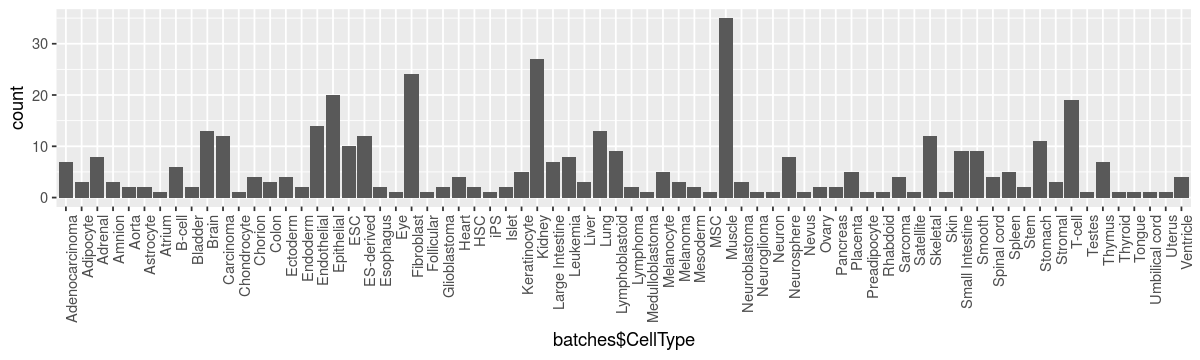

In [5]:
#There are 410 samples, we can plot the number of samples by CellType as follows: 
#ggplot2 is an R librar that helps to generate visually appealing plots. 
library(repr)
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=3)
ggplot(data = batches, mapping = aes(x = batches$CellType)) + 
    geom_bar()+
    theme(axis.text.x=element_text(angle=90,hjust=1))

In [44]:
# We will focus our analysis on 4 of the cell types and check for differential gene expression between them.  

#Pick out the Sample values in the batches dataframe that correspond to our four CellType values of interest 
celltypes=c("Colon","Bladder","B-cell","Skeletal")
sample_subset=batches$Sample[batches$CellType %in% celltypes ]
print(length(sample_subset))

#Select just the 'sample_subset' from our data frame of gene expression values 
data_subset=data[,sample_subset]
batches_subset=batches[batches$CellType %in% celltypes,]
#sanity check row & column numbers in data_subset 
print(nrow(data_subset)) #should not change -- this is the gene axis 
print(ncol(data_subset)) #should decrease to 106 

[1] 23
[1] 57820
[1] 23


In [45]:
#Step 3 : We are interested in genes that are differentially expressed across samples, so we can exclude genes that have 0 TPM
#in all samples -- these are not of interest. use the rowSums command to find such genes 
not_expressed=which(rowSums(data_subset)==0)
#How many genes does this filter exclude? 
num_not_expressed=length(not_expressed)
print(num_not_expressed)
#Finally, remove them from the data matrix
data_subset=data_subset[-not_expressed,]
#Sanity check -- the matrix dimensionality should decrease 
print(nrow(data_subset))

[1] 9028
[1] 48792


In [46]:
#Step 4: We compute asinh(tpm) to normalize the data 
#TODO: more information on why we need to do this -- definitely not intuitive so worth explaning well! 
data_subset=asinh(data_subset)

In [47]:
#Step 5: Perform principal component analysis on the data to check for obvious batch effects and any other
# odd clustering patterns 
data.pca=prcomp(t(data_subset),center=FALSE,scale=FALSE)

 [1] 88.88924059  3.02249486  1.27796822  1.14063264  0.95124097  0.72580206
 [7]  0.60071187  0.53800152  0.49462504  0.39860801  0.38711095  0.31926592
[13]  0.30063653  0.24324950  0.16941719  0.16477259  0.11749428  0.10068569
[19]  0.08138458  0.07665697


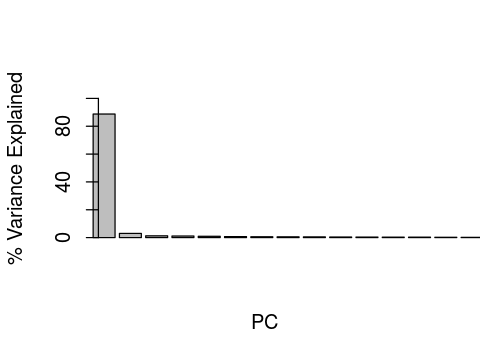

In [48]:
#plot the amount of variance explained by the first 20 principal components 
library(repr)
options(repr.plot.width=4, repr.plot.height=3)
barplot(100*data.pca$sdev^2/sum(data.pca$sdev^2),width=1,xlim=c(1,15),ylim=c(0,100),xlab="PC",ylab="% Variance Explained")
print(100*data.pca$sdev[1:20]^2/sum(data.pca$sdev[1:20]^2))

In [49]:
# Define your color palette if you don't like the built-in one in R (this step is optional)
# Use hex-codes to map to colors 
cbPalette <- c('#0000FF','#8B4726',
               '#548B54','#CD6889','#EE4000','#3A5FCD',
               '#000080','#32CD32','#20B2AA','#EE9572','#CDBE70',
               '#8B008B','#68838B','#8B8970','#8B3A3A','#8A8A8A',
               '#ADFF2F','#FF3030','#EEC900','#00B2EE','#9BCD9B')

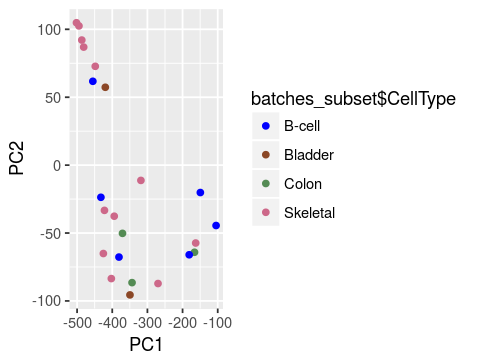

In [50]:
#plot combinations of PC's 1 - 3, since these explain the vast majority of the variance (~94%)
#options(repr.plot.width=4, repr.plot.height=3)
library(ggplot2)
ggplot(data=as.data.frame(data.pca$x),
       aes(x=data.pca$x[,c(1)],
           y=data.pca$x[,c(2)],
          colour=batches_subset$CellType))+
geom_point()+
xlab("PC1")+
ylab("PC2")+
scale_colour_manual(values=cbPalette)



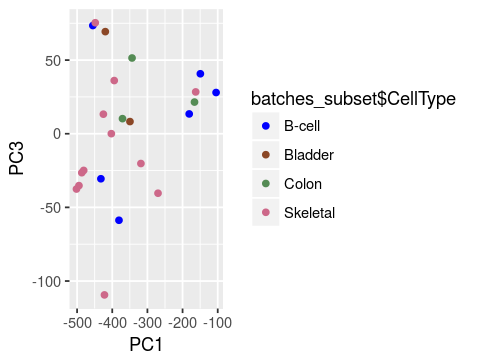

In [52]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(as.data.frame(data.pca$x),
       aes(x=data.pca$x[,c(1)],
           y=data.pca$x[,c(3)],
           colour=batches_subset$CellType))+
geom_point()+
xlab("PC1")+
ylab("PC3")+
scale_colour_manual(values=cbPalette)


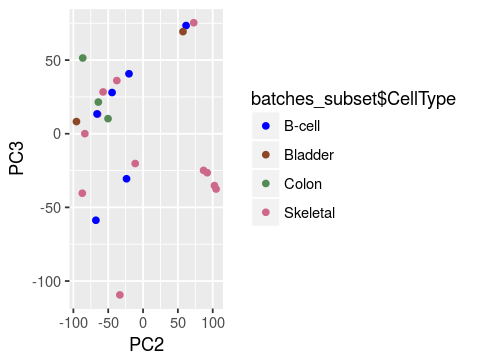

In [53]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(as.data.frame(data.pca$x),
       aes(x=data.pca$x[,c(2)],
           y=data.pca$x[,c(3)],
           colour=batches_subset$CellType))+
geom_point()+
xlab("PC2")+
ylab("PC3")+
scale_colour_manual(values=cbPalette)

In [54]:
#Step 6 we would like to group genes by similar expression patterns. To do this, we perform k-means clustering :
set.seed(20)
#We explore what happens as we vary the number of cluster: 
gene_clusters3 <- kmeans(data_subset, 3, nstart = 20)


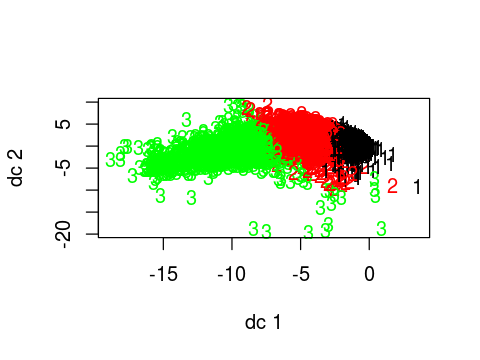

In [55]:
library(cluster)
library(fpc)
plotcluster(data_subset,gene_clusters3$cluster)

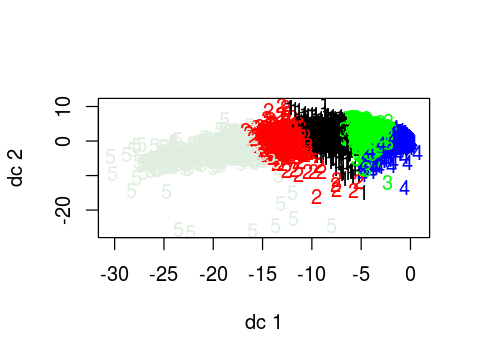

In [58]:
#gene_clusters5 <- kmeans(data_subset, 5, nstart = 20)
plotcluster(data_subset,gene_clusters5$cluster)

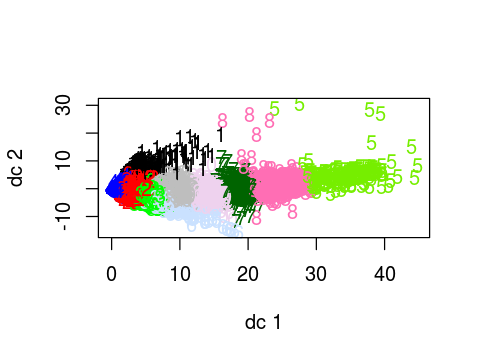

In [59]:
#gene_clusters10 <- kmeans(data_subset, 10, nstart = 20)
plotcluster(data_subset,gene_clusters10$cluster)